<a href="https://colab.research.google.com/github/Mambo-Linco/Boston-House-Prediction-By-Lincoln-Chatikobo/blob/main/House_Price_Prediction_By_Lincoln_Chatikobo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [204]:
datasett = pd.read_csv("BostonHousing.csv")

In [205]:
datasett

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [206]:
datasett.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [207]:
datasett.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [208]:
#  printing number of columns and rows
datasett.shape

(506, 14)

In [209]:
#checking the null values
datasett.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [210]:
print(datasett.describe())
print(datasett.info())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

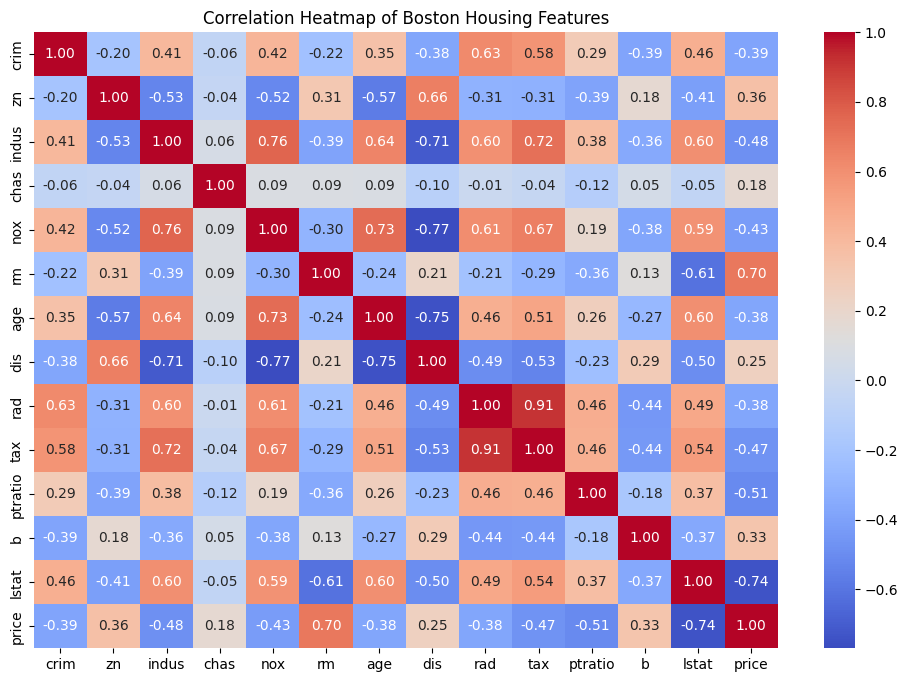

In [211]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(datasett.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Boston Housing Features')
plt.show()


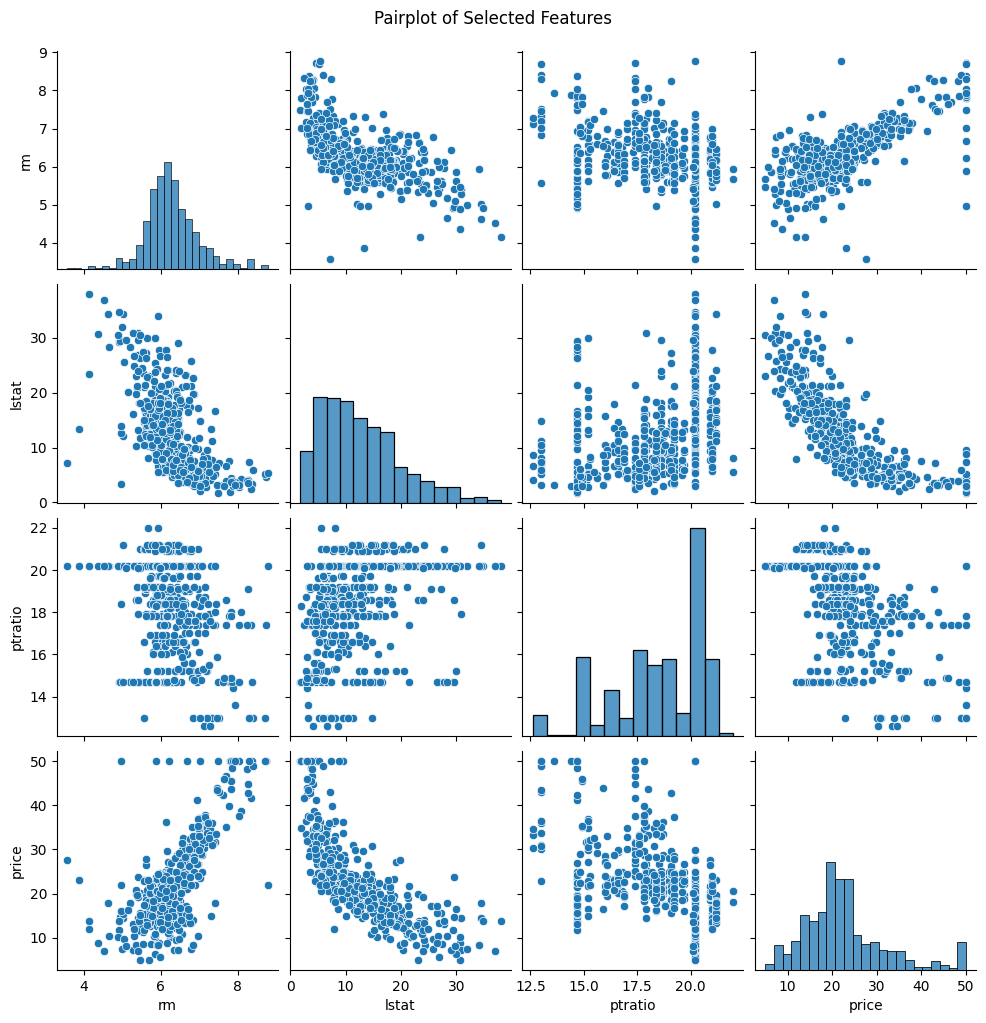

In [212]:
# Pairplot of Selected Features
selected = ['rm', 'lstat', 'ptratio', 'price']
sns.pairplot(datasett[selected])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


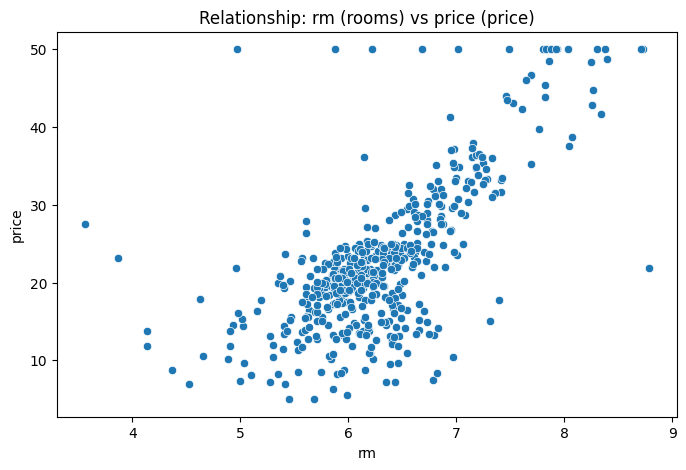

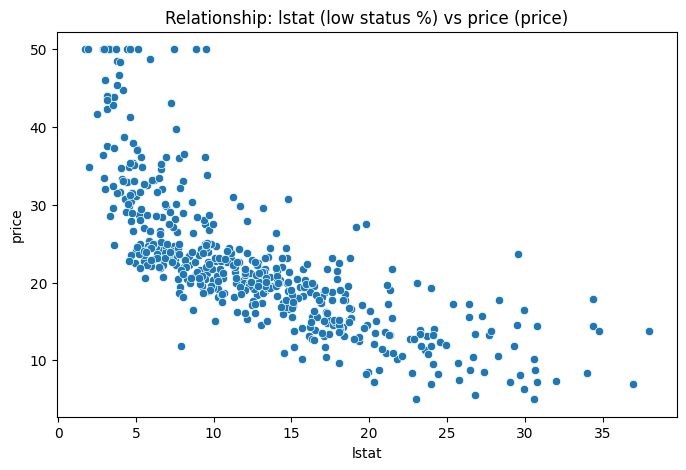

In [213]:
# Scatter plot for relationships
plt.figure(figsize=(8, 5))
sns.scatterplot(x='rm', y='price', data=datasett)
plt.title('Relationship: rm (rooms) vs price (price)')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='lstat', y='price', data=datasett)
plt.title('Relationship: lstat (low status %) vs price (price)')
plt.show()


In [214]:
selected_columns = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','price']
df = datasett[selected_columns]

In [215]:
X = df.drop('price', axis=1)  # price = target variable (house price)
Y = df['price']

In [216]:
print("Features shape:", X.shape)
print("Target shape:", Y.shape)

Features shape: (506, 13)
Target shape: (506,)


In [217]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [218]:
Y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [219]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [220]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [221]:
print(Y.shape, Y_train.shape, Y_test.shape)

(506,) (404,) (102,)


In [222]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [223]:
model_prediction = model.predict(X_train)

In [224]:
model_prediction

array([10.96952405, 19.41196567, 23.06419602, 12.1470648 , 18.3738116 ,
       25.24677946, 20.77024774, 23.90932632,  7.81713319, 19.60988098,
       21.8202963 , 27.59615864, 32.67986504, 15.12308446, 35.3964561 ,
       12.99688651, 20.728181  , 28.30223542, 15.61724836, 24.45143096,
        4.61794591, 23.76681932, 25.56178249, 22.98928526, 24.5213025 ,
       34.06407919, 19.71166707, 39.11233072, 14.62515846, 24.81139885,
       18.02332883, 20.85836445,  9.57577261, 20.87246835, 22.28583096,
       31.79327155, 31.04748307, 15.70611763, 17.01382935, 28.23332703,
       24.27661276, 16.88670215,  6.90720745, 26.75808901, 22.586493  ,
       17.53664716, 13.77197016, 41.04840929, 16.44690754, 18.23531669,
       25.37038646, 23.64581399, 22.05322581, 20.83620499, 16.93508273,
       22.797579  , 29.13333934,  7.69310515, 24.60571452, 17.2358028 ,
       21.10846551, 25.15150324, 27.33394823, 21.30494963, 41.5811902 ,
       19.19666651, 15.37955448, 19.33545877, 17.04687638, 22.96

In [225]:
Y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(Y_test, Y_pred))
print("MSE:", mean_squared_error(Y_test, Y_pred))

R^2 Score: 0.6687594935356326
MSE: 24.291119474973478


In [226]:
model2 = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model2.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [227]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=5, scoring='neg_mean_absolute_error')
grid.fit(X_train, Y_train)

best_model = grid.best_estimator_


In [228]:
from sklearn.metrics import mean_absolute_error
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(Y_test, y_pred)
print("R^2 Score:", r2_score(Y_test, y_pred))
print(f'Mean Absolute Error: {mae:.2f}')


R^2 Score: 0.8840683853897404
Mean Absolute Error: 2.07


In [229]:
input = np.array([[0.04741, 0.0, 11.93, 0, 0.573,	6.030, 80.8, 2.5050, 1, 273,	21.0,	396.90, 7.88	]])
model2.predict(input) #15.45

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([15.38340146])

In [230]:
import pickle
pickle.dump(model,open('house_price_pridiction_by_lincoln_chatikobo.pkl', 'wb'))